# Global Entities - per Entity Group - Visualizer 

#### Version 1.0

### TODO

- ~~Line plot for world~~
- Line plot of aggregated countries and compare to world
- ~~Line plot per country/region/income/etc~~
- ~~Heatmap for corellation between metrics per entity~~
- Correlation between metrics across entities

### Observations

## Setup

### Import Packages

In [1]:
from datetime import datetime, date
from pprint import pprint
from collections import OrderedDict
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Set ipython's max row display
# pd.set_option('display.max_row', 1000)
# Set iPython's max column width
pd.set_option('display.max_columns', 50)

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [20, 10]

c:\Users\abdul\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Functions

In [2]:
def masked_heatmap():
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig,ax = plt.subplots()
    sns.heatmap(corr,center = 0, fmt = ".3f", square = True, annot= True, mask=mask)

## Global Variables

#### Dataset Parameters

In [3]:
file_name = '../data/silver_tables/yearly_values_per_entity.csv'

year_range = [1960, 2022]
metric_agg = 'last_year'
metric_agg = 'growth_rate'
metric_agg = '?'

In [4]:
country_list = ['United Arab Emirates', 'Japan', 'Ghana'] #For country level analysis

In [5]:
key_columns = [
    'Annual CO2 emissions', 'Annual change in primary energy consumption (%)',
    'Per capita electricity (kWh)',
    'Fossil fuels per capita (kWh)', 'Fossil fuels (% equivalent primary energy)',
    'Renewables per capita (kWh - equivalent)', 'Renewables (% electricity)',
    'Solar Generation - TWh', 'prod of Electricity from solar (TWh)',
]

corr_columns = [
    'Annual CO2 emissions', 'Annual change in primary energy consumption (%)',
    'Per capita electricity (kWh)',
    'Fossil fuels per capita (kWh)',
    'Renewables per capita (kWh - equivalent)',
]

## Data Prep

In [6]:
df_original = pd.read_csv(file_name)

In [7]:
df_original = df_original.loc[
    (df_original['Year'] > year_range[0])
    & (df_original['Year'] < year_range[1])
]

In [8]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13231 entries, 34 to 21878
Data columns (total 36 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               13231 non-null  object 
 1   Year                                                 13231 non-null  int64  
 2   Code                                                 13231 non-null  object 
 3   Region                                               12239 non-null  object 
 4   Income group                                         12178 non-null  object 
 5   Lending category                                     8374 non-null   object 
 6   Fossil fuels per capita (kWh)                        4270 non-null   float64
 7   Oil Consumption - TWh                                4299 non-null   float64
 8   Economy                                              12239 non-nu

In [9]:
df_original.head()

,Entity,Year,Code,Region,Income group,Lending category,Fossil fuels per capita (kWh),Oil Consumption - TWh,Economy,"Coal (TWh, direct energy)",Geo Biomass Other - TWh,Wind Generation - TWh,Fossil fuels (% equivalent primary energy),prod of Other renewables including bioenergy (TWh),Coal Production - TWh,Gas Production - TWh,"Gas (TWh, direct energy)",Per capita electricity (kWh),Renewables (% electricity),Annual CO2 emissions,Fossil fuels (TWh),Hydro Generation - TWh,Oil Production - TWh,Population density (people per sq. km of land area),Coal Consumption - TWh,Renewables per capita (kWh - equivalent),prod of Electricity from solar (TWh),Annual change in primary energy consumption (%),Solar Generation - TWh,Land area (sq. km),Gas Consumption - TWh,"Oil (TWh, direct energy)",prod of Electricity from hydro (TWh),Fossil fuels (% growth),prod of Electricity from wind (TWh),Entity_Category
34,Aruba,1961,ABW,Latin America & Caribbean,High income,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,645553.0,NaN,NaN,NaN,307.966667,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,Country
35,Aruba,1962,ABW,Latin America & Caribbean,High income,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,708942.0,NaN,NaN,NaN,312.411111,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,Country
36,Aruba,1963,ABW,Latin America & Caribbean,High income,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,679088.0,NaN,NaN,NaN,314.994444,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,Country
37,Aruba,1964,ABW,Latin America & Caribbean,High income,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660275.0,NaN,NaN,NaN,316.827778,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,Country
38,Aruba,1965,ABW,Latin America & Caribbean,High income,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,592387.0,NaN,NaN,NaN,318.650000,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,Country


In [10]:
df_original.describe()

,Year,Fossil fuels per capita (kWh),Oil Consumption - TWh,"Coal (TWh, direct energy)",Geo Biomass Other - TWh,Wind Generation - TWh,Fossil fuels (% equivalent primary energy),prod of Other renewables including bioenergy (TWh),Coal Production - TWh,Gas Production - TWh,"Gas (TWh, direct energy)",Per capita electricity (kWh),Renewables (% electricity),Annual CO2 emissions,Fossil fuels (TWh),Hydro Generation - TWh,Oil Production - TWh,Population density (people per sq. km of land area),Coal Consumption - TWh,Renewables per capita (kWh - equivalent),prod of Electricity from solar (TWh),Annual change in primary energy consumption (%),Solar Generation - TWh,Land area (sq. km),Gas Consumption - TWh,"Oil (TWh, direct energy)",prod of Electricity from hydro (TWh),Fossil fuels (% growth),prod of Electricity from wind (TWh)
count,13231.000000,4270.000000,4299.000000,57.000000,4230.000000,4230.000000,4270.000000,7050.000000,1397.000000,2514.000000,57.000000,5828.000000,5665.000000,1.265100e+04,4270.000000,4292.000000,2553.000000,11042.000000,4273.000000,4292.000000,7113.000000,9354.000000,4230.000000,1.197800e+04,4296.000000,57.000000,7178.000000,4255.000000,7113.000000
mean,1991.724662,32590.368226,1015.737954,28584.640556,5.525746,6.126806,86.307820,3.366912,1915.282764,941.158999,21492.190695,3924.760158,29.633481,2.164809e+08,2346.057603,62.145414,1707.803287,270.028485,756.214677,4.578573,1.344705,4.533664,2.250895,6.467467e+05,564.805312,39160.740543,38.012262,3.538322,3.658208
std,17.303559,34472.620328,4706.367669,10007.255369,34.808495,61.993965,15.585076,27.092075,6167.601614,3615.938174,9564.826179,5117.133819,32.033628,1.755023e+09,11082.105692,308.745114,5858.493747,1308.026452,3785.186997,13.474483,22.090646,31.757811,28.611929,1.812242e+06,2785.492795,8988.199100,240.564170,26.995583,47.898591
min,1961.000000,155.807388,0.097381,16060.809570,0.000000,0.000000,12.804697,0.000000,0.339596,0.000000,6303.798828,0.000000,0.000000,3.664000e+03,0.097381,0.000000,0.000000,0.098625,0.000000,0.000000,0.000000,-95.005081,0.000000,1.000000e+01,0.000000,17989.603516,0.000000,-49.590828,0.000000
25%,1977.000000,11678.774170,65.349743,20363.539062,0.000000,0.000000,80.717112,0.000000,37.385506,45.443999,14118.032227,572.427170,1.366416,6.012190e+05,117.750929,0.430750,102.900040,19.113774,3.395960,0.172228,0.000000,-0.781557,0.000000,1.827000e+04,8.854822,33680.054688,0.017904,-1.007167,0.000000
50%,1992.000000,25363.719727,142.951569,25963.681641,0.046381,0.000000,91.689793,0.000000,125.336014,144.380302,20265.484375,2469.344605,16.124605,5.064147e+06,283.652481,4.616636,344.998383,63.247178,32.584167,0.806088,0.000000,2.361172,0.000000,1.074000e+05,53.573006,38151.847656,1.560000,2.493978,0.000000
75%,2007.000000,40195.003906,418.514847,40175.359375,1.373498,0.070833,97.799118,0.368750,815.064575,404.810089,29315.390625,5388.259033,53.125000,4.262826e+07,967.343674,23.120900,1131.237549,149.543597,169.332794,2.851986,0.002000,6.958872,0.005899,4.727100e+05,241.780823,47172.609375,9.962750,6.371659,0.006000
max,2021.000000,308704.218750,53368.628906,45161.207031,762.782654,1861.939819,100.000015,762.782654,46550.605469,40368.828125,40374.605469,56781.601560,100.000000,3.670250e+10,136131.468750,4345.990234,52181.949219,21388.600000,45161.207031,153.883406,1032.501221,1553.104980,1032.501221,1.638995e+07,40374.605469,53368.628906,4345.990234,1553.104980,1861.939819


## Visualizations

### World

In [11]:
category_filter = "World"

df = df_original.copy().loc[df_original['Entity_Category'] == category_filter]

In [12]:
df.head()

,Entity,Year,Code,Region,Income group,Lending category,Fossil fuels per capita (kWh),Oil Consumption - TWh,Economy,"Coal (TWh, direct energy)",Geo Biomass Other - TWh,Wind Generation - TWh,Fossil fuels (% equivalent primary energy),prod of Other renewables including bioenergy (TWh),Coal Production - TWh,Gas Production - TWh,"Gas (TWh, direct energy)",Per capita electricity (kWh),Renewables (% electricity),Annual CO2 emissions,Fossil fuels (TWh),Hydro Generation - TWh,Oil Production - TWh,Population density (people per sq. km of land area),Coal Consumption - TWh,Renewables per capita (kWh - equivalent),prod of Electricity from solar (TWh),Annual change in primary energy consumption (%),Solar Generation - TWh,Land area (sq. km),Gas Consumption - TWh,"Oil (TWh, direct energy)",prod of Electricity from hydro (TWh),Fossil fuels (% growth),prod of Electricity from wind (TWh),Entity_Category
15258,World,1961,OWID_WRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.417463e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World
15259,World,1962,OWID_WRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.750057e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World
15260,World,1963,OWID_WRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.027152e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World
15261,World,1964,OWID_WRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.082886e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World
15262,World,1965,OWID_WRL,NaN,NaN,NaN,12107.379883,17989.603516,NaN,16140.178711,17.985231,0.0,93.37812,17.985231,NaN,NaN,6303.798828,NaN,NaN,1.131723e+10,40433.578125,923.198059,18231.082031,NaN,16140.178711,0.836891,0.0,NaN,0.0,NaN,6303.798828,17989.603516,923.198059,NaN,0.0,World


In [13]:
df.describe()

,Year,Fossil fuels per capita (kWh),Oil Consumption - TWh,"Coal (TWh, direct energy)",Geo Biomass Other - TWh,Wind Generation - TWh,Fossil fuels (% equivalent primary energy),prod of Other renewables including bioenergy (TWh),Coal Production - TWh,Gas Production - TWh,"Gas (TWh, direct energy)",Per capita electricity (kWh),Renewables (% electricity),Annual CO2 emissions,Fossil fuels (TWh),Hydro Generation - TWh,Oil Production - TWh,Population density (people per sq. km of land area),Coal Consumption - TWh,Renewables per capita (kWh - equivalent),prod of Electricity from solar (TWh),Annual change in primary energy consumption (%),Solar Generation - TWh,Land area (sq. km),Gas Consumption - TWh,"Oil (TWh, direct energy)",prod of Electricity from hydro (TWh),Fossil fuels (% growth),prod of Electricity from wind (TWh)
count,61.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,41.000000,52.000000,57.000000,37.000000,37.000000,6.000000e+01,57.000000,57.000000,57.000000,0.0,57.000000,57.000000,57.000000,56.000000,57.000000,0.0,57.000000,57.000000,57.000000,56.000000,57.000000
mean,1991.000000,15760.118198,39160.740543,28584.640556,208.390151,228.345476,87.906087,208.390151,32946.541587,22949.439247,21492.190695,2741.295427,20.348038,2.316182e+10,89237.569422,2431.294728,38535.582511,NaN,28584.640556,1.454433,84.041714,2.443004,84.041714,NaN,21492.190695,39160.740543,2431.294728,2.216326,228.345476
std,17.752934,1366.411639,8988.199100,10007.255369,205.724881,449.014082,3.220952,205.724881,8964.818754,8939.489789,9564.826179,481.483171,2.784003,7.980183e+09,28102.326104,985.437508,8416.048570,NaN,10007.255369,0.482532,217.619927,2.130705,217.619927,NaN,9564.826179,8988.199100,985.437508,2.336746,449.014082
min,1961.000000,12107.379883,17989.603516,16060.809570,17.985231,0.000000,82.211304,17.985231,21445.263672,9760.991211,6303.798828,2032.845825,17.162390,9.417463e+09,40433.578125,923.198059,18231.082031,NaN,16060.809570,0.836891,0.000000,-3.985941,0.000000,NaN,6303.798828,17989.603516,923.198059,-5.385285,0.000000
25%,1976.000000,15112.447266,33680.054688,20363.539062,46.499256,0.006000,85.727249,46.499256,25627.955078,14695.416992,14118.032227,2283.061035,18.754833,1.775768e+10,69261.773438,1695.186157,33519.679688,NaN,20363.539062,1.183239,0.000000,1.005194,0.000000,NaN,14118.032227,33680.054688,1695.186157,0.696263,0.006000
50%,1991.000000,15486.079102,38151.847656,25963.681641,135.519318,5.697569,86.512390,135.519318,27938.126953,21383.237305,20265.484375,2648.546631,19.407053,2.265960e+10,83911.687500,2341.457520,37619.203125,NaN,25963.681641,1.331868,0.556698,2.243525,0.556698,NaN,20265.484375,38151.847656,2341.457520,2.006173,5.697569
75%,2006.000000,16869.917969,47172.609375,40175.359375,294.843079,171.506699,91.053261,294.843079,42621.265625,29644.438965,29315.390625,3185.902832,20.832720,2.984797e+10,115948.109375,3072.892334,46038.386719,NaN,40175.359375,1.565588,7.817910,3.768480,7.817910,NaN,29315.390625,47172.609375,3072.892334,3.579623,171.506699
max,2021.000000,17811.734375,53368.628906,45161.207031,762.782654,1861.939819,93.378120,762.782654,46550.605469,40368.828125,40374.605469,3599.092773,27.864630,3.670250e+10,136131.468750,4345.990234,52181.949219,NaN,45161.207031,2.827960,1032.501221,6.708479,1032.501221,NaN,40374.605469,53368.628906,4345.990234,6.728780,1861.939819


In [14]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

#### Lineplots - Yearly

Text(0.5, 1.0, 'Year x Annual CO2 emissions per World')

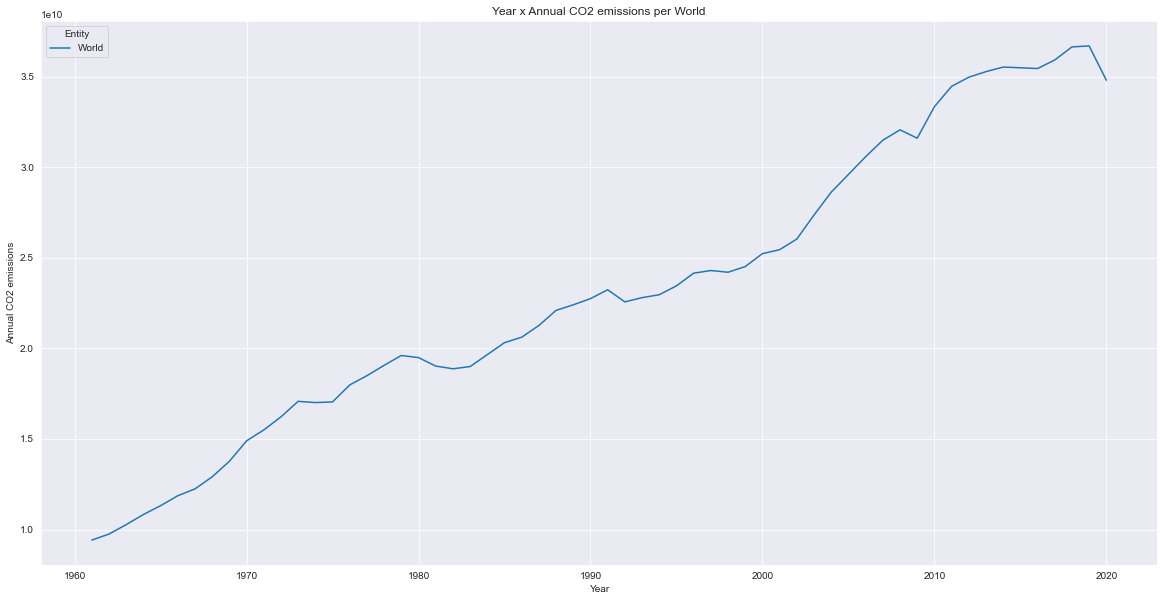

In [15]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual change in primary energy consumption (%)'] per World")

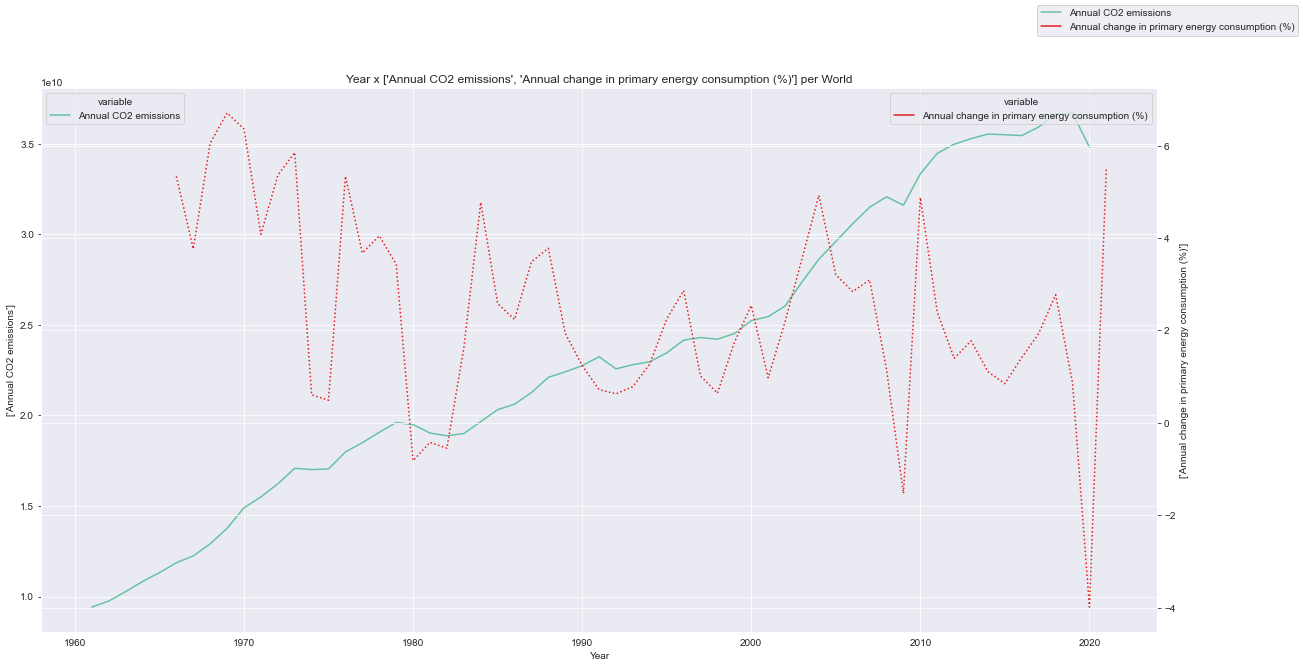

In [16]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue='variable', palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue='variable', palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] per World")

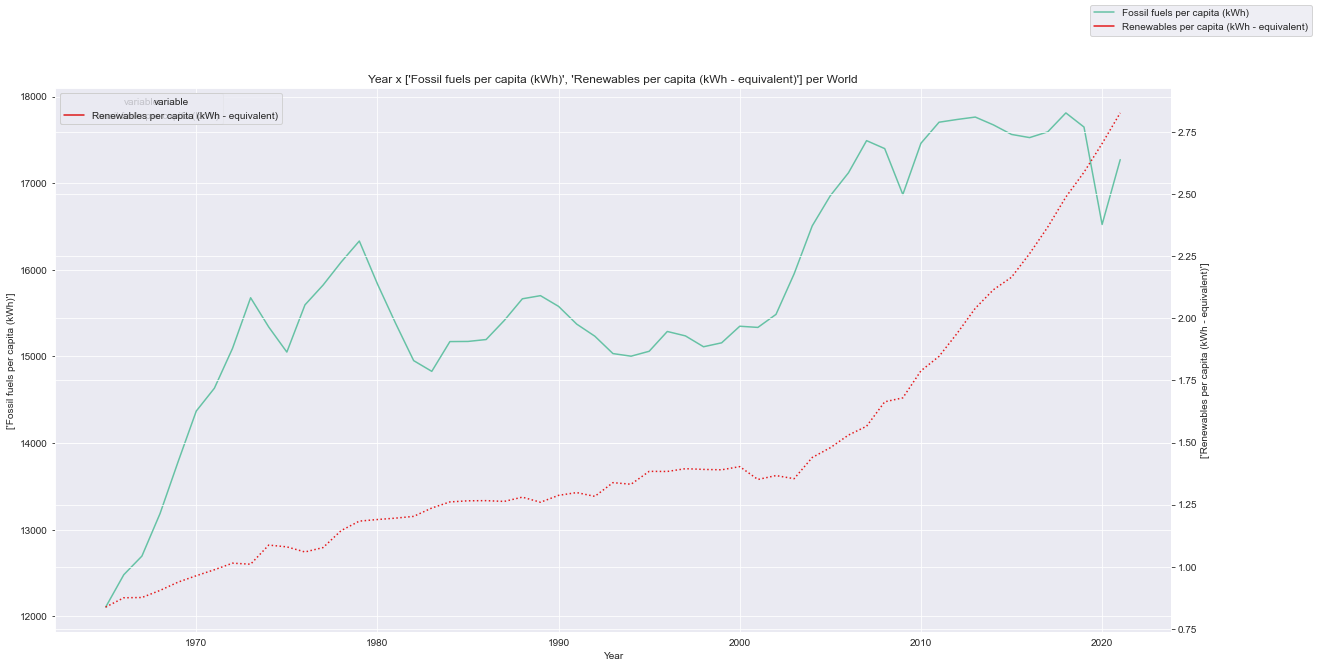

In [17]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue='variable', palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue='variable', palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)', 'Fossil fuels per capita (kWh)'] per World")

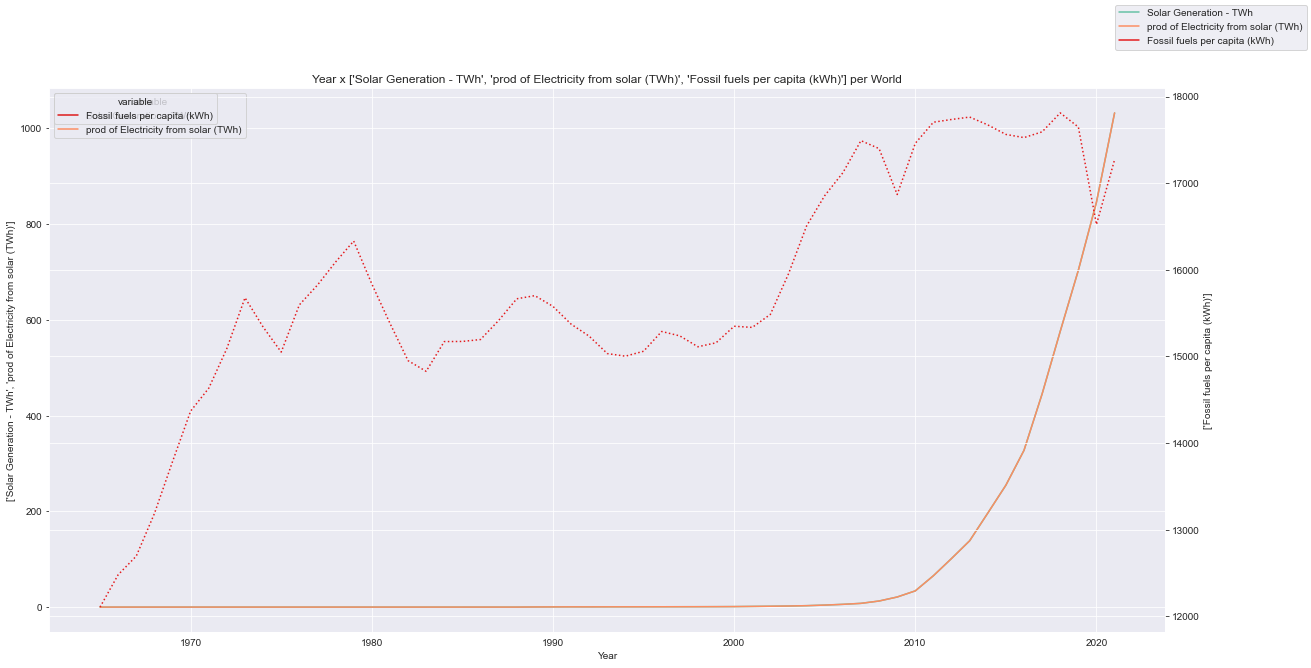

In [18]:
y1 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']
y2 = ['Fossil fuels per capita (kWh)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue='variable', palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue='variable', palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

#### Correlation Heatmap - For Entity Across Metrics

In [19]:
corr = df[corr_columns].corr()

Text(0.5, 1.0, 'Correlation of Key Metrics across Years in Entity [World]')

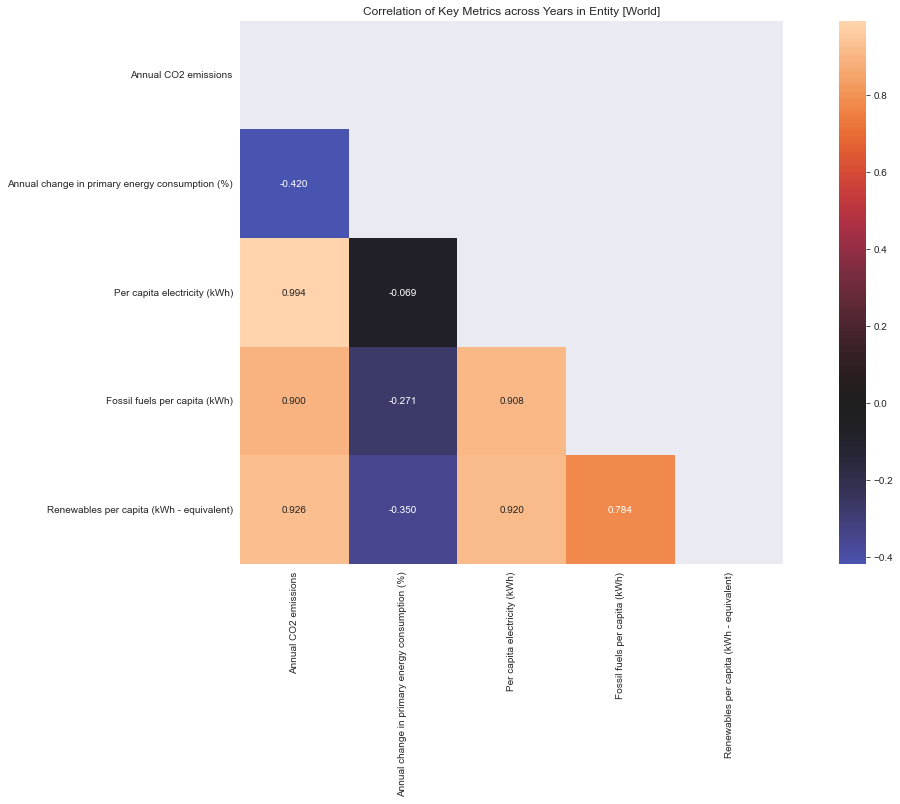

In [20]:
masked_heatmap()
plt.title(f"Correlation of Key Metrics across Years in Entity [{category_filter}]")

### Income Level

In [21]:
df_original['Entity_Category'].value_counts()

Country      13131
World           61
Continent       39
Name: Entity_Category, dtype: int64

In [22]:
category_filter = "Income Level"

df = df_original.copy().loc[df_original['Entity_Category'] == category_filter]

In [23]:
df.head()

,Entity,Year,Code,Region,Income group,Lending category,Fossil fuels per capita (kWh),Oil Consumption - TWh,Economy,"Coal (TWh, direct energy)",Geo Biomass Other - TWh,Wind Generation - TWh,Fossil fuels (% equivalent primary energy),prod of Other renewables including bioenergy (TWh),Coal Production - TWh,Gas Production - TWh,"Gas (TWh, direct energy)",Per capita electricity (kWh),Renewables (% electricity),Annual CO2 emissions,Fossil fuels (TWh),Hydro Generation - TWh,Oil Production - TWh,Population density (people per sq. km of land area),Coal Consumption - TWh,Renewables per capita (kWh - equivalent),prod of Electricity from solar (TWh),Annual change in primary energy consumption (%),Solar Generation - TWh,Land area (sq. km),Gas Consumption - TWh,"Oil (TWh, direct energy)",prod of Electricity from hydro (TWh),Fossil fuels (% growth),prod of Electricity from wind (TWh),Entity_Category


In [24]:
df.describe()

,Year,Fossil fuels per capita (kWh),Oil Consumption - TWh,"Coal (TWh, direct energy)",Geo Biomass Other - TWh,Wind Generation - TWh,Fossil fuels (% equivalent primary energy),prod of Other renewables including bioenergy (TWh),Coal Production - TWh,Gas Production - TWh,"Gas (TWh, direct energy)",Per capita electricity (kWh),Renewables (% electricity),Annual CO2 emissions,Fossil fuels (TWh),Hydro Generation - TWh,Oil Production - TWh,Population density (people per sq. km of land area),Coal Consumption - TWh,Renewables per capita (kWh - equivalent),prod of Electricity from solar (TWh),Annual change in primary energy consumption (%),Solar Generation - TWh,Land area (sq. km),Gas Consumption - TWh,"Oil (TWh, direct energy)",prod of Electricity from hydro (TWh),Fossil fuels (% growth),prod of Electricity from wind (TWh)
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Lineplots - Yearly

In [25]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

Text(0.5, 1.0, 'Year x Annual CO2 emissions per Income Level')

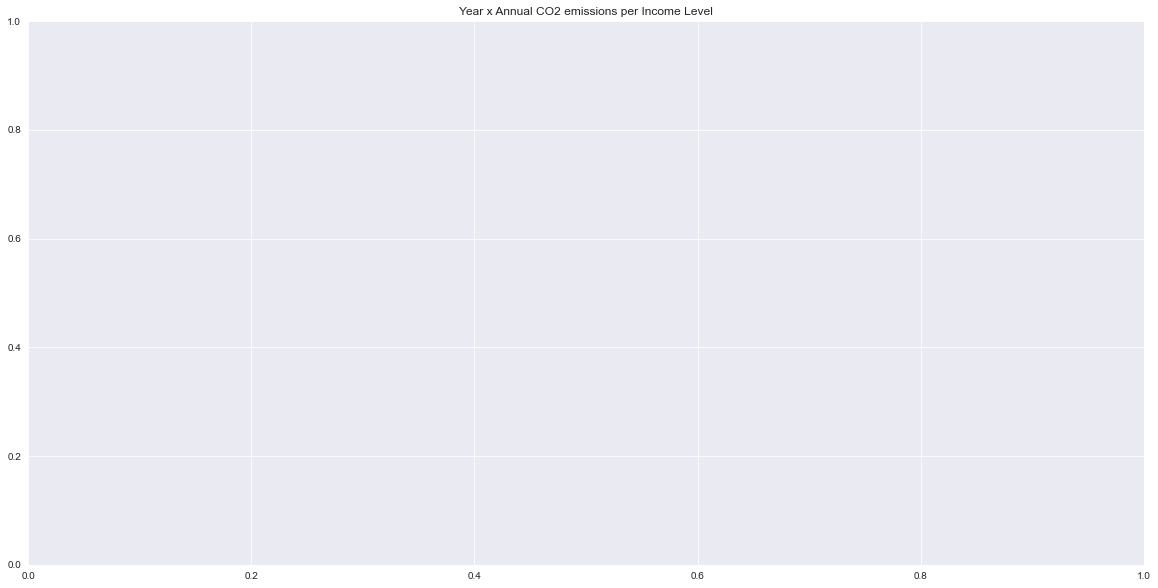

In [26]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

No handles with labels found to put in legend.


Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual change in primary energy consumption (%)'] per Income Level")

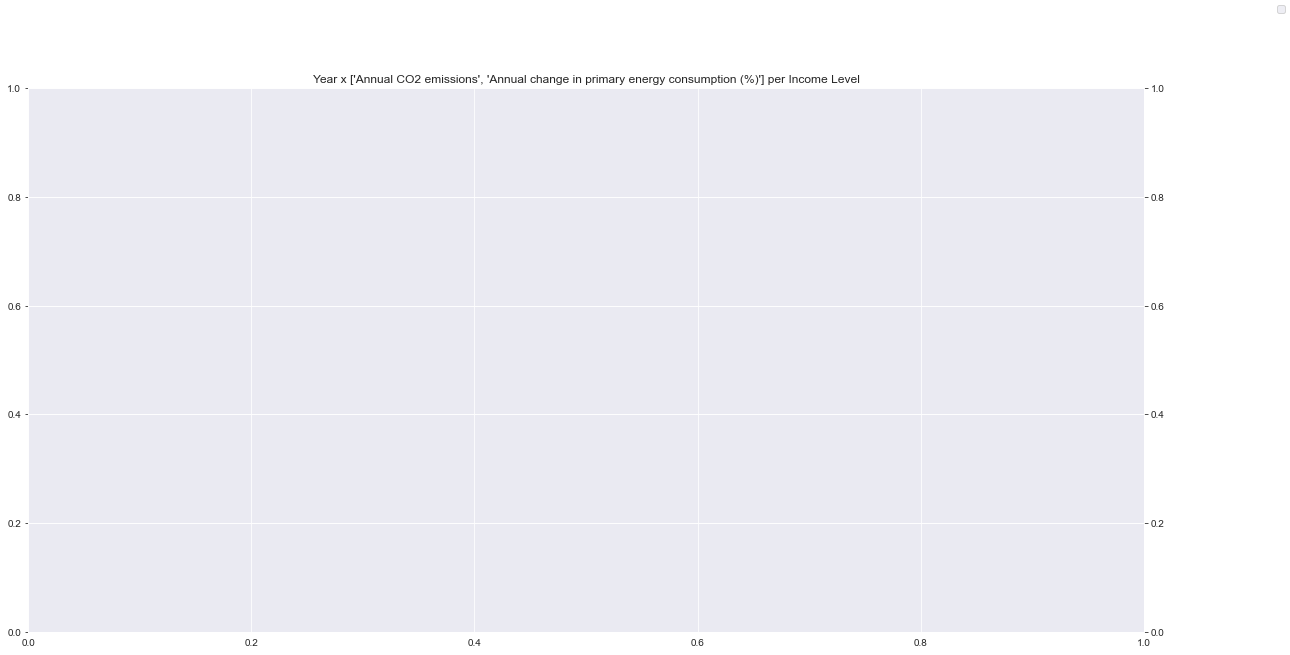

In [27]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

No handles with labels found to put in legend.


Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] per Income Level")

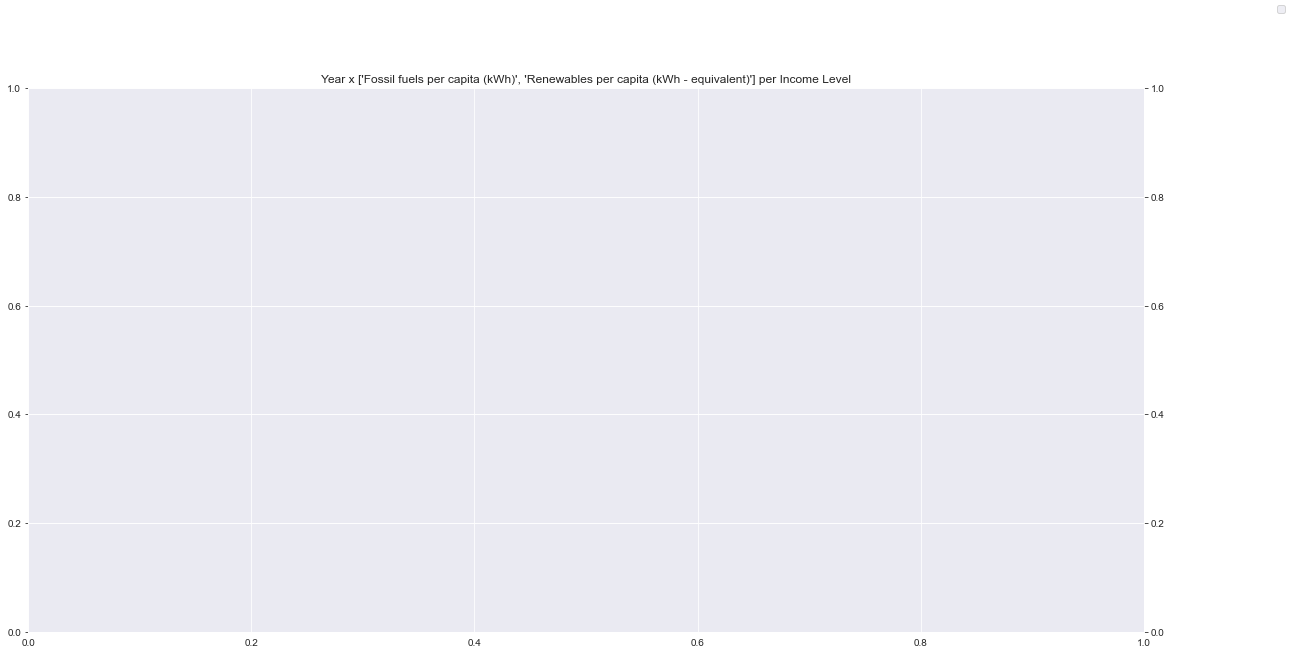

In [28]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

No handles with labels found to put in legend.


Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Solar Generation - TWh', 'prod of Electricity from solar (TWh)'] per Income Level")

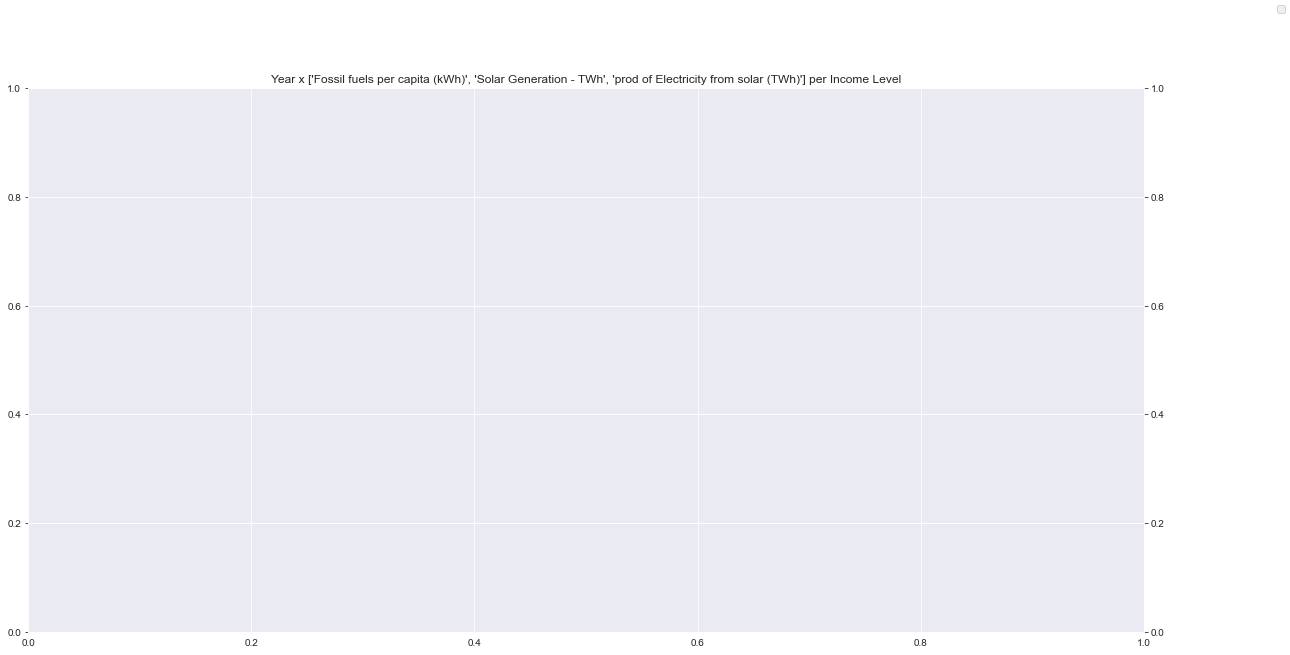

In [29]:
y1 = ['Fossil fuels per capita (kWh)']
y2 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']


df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

#### Correlation Heatmap - For Entity Across Metrics

In [30]:
#TODO Multiplot for each Income Level
# corr = df[key_columns].corr()

# sns.heatmap(data=corr)
# plt.title(f"Correlation of Key Metrics across Years in Category [{category_filter}]")

#### Correlation Heatmap - For Key Metrics Across Entities in 2020

c:\Users\abdul\Anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\abdul\Anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


Text(0.5, 1.0, 'Correlation of Key Metrics across each Category [Income Level]')

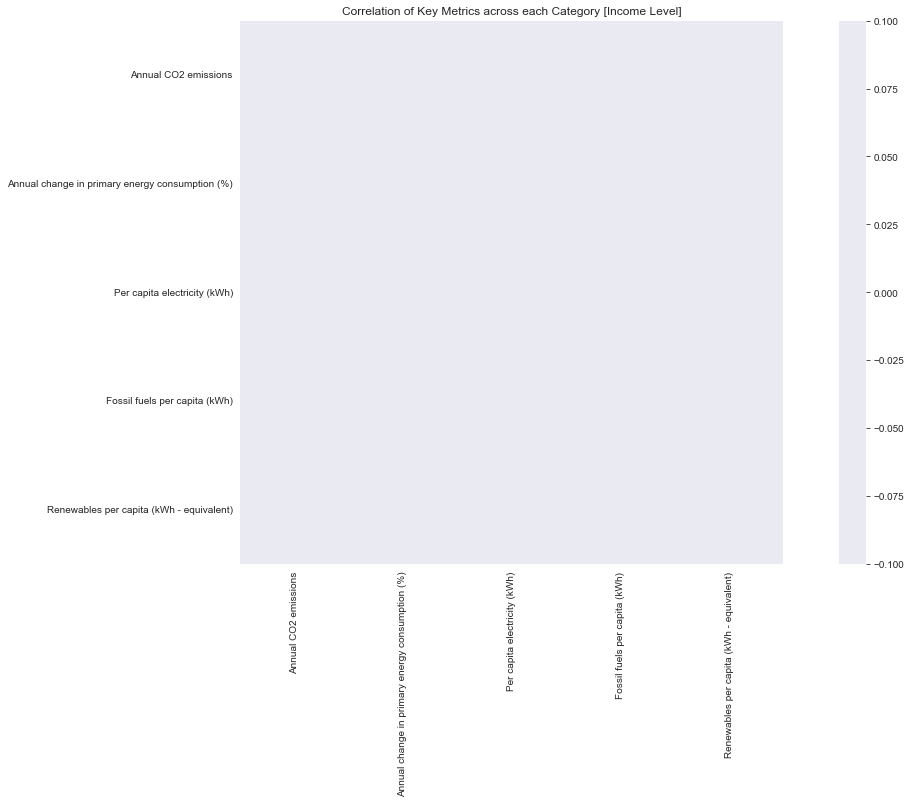

In [31]:
corr = df.loc[df['Year'] == 2020][corr_columns].corr()

masked_heatmap()
plt.title(f"Correlation of Key Metrics across each Category [{category_filter}]")

### Continent

In [32]:
category_filter = "Continent"

df = df_original.copy().loc[df_original['Entity_Category'] == category_filter]

In [33]:
df.head()

,Entity,Year,Code,Region,Income group,Lending category,Fossil fuels per capita (kWh),Oil Consumption - TWh,Economy,"Coal (TWh, direct energy)",Geo Biomass Other - TWh,Wind Generation - TWh,Fossil fuels (% equivalent primary energy),prod of Other renewables including bioenergy (TWh),Coal Production - TWh,Gas Production - TWh,"Gas (TWh, direct energy)",Per capita electricity (kWh),Renewables (% electricity),Annual CO2 emissions,Fossil fuels (TWh),Hydro Generation - TWh,Oil Production - TWh,Population density (people per sq. km of land area),Coal Consumption - TWh,Renewables per capita (kWh - equivalent),prod of Electricity from solar (TWh),Annual change in primary energy consumption (%),Solar Generation - TWh,Land area (sq. km),Gas Consumption - TWh,"Oil (TWh, direct energy)",prod of Electricity from hydro (TWh),Fossil fuels (% growth),prod of Electricity from wind (TWh),Entity_Category
835,Antarctica,1987,ATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3664.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continent
836,Antarctica,1988,ATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.987356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continent
837,Antarctica,1989,ATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.396567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continent
838,Antarctica,1990,ATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.692313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continent
839,Antarctica,1991,ATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14656.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continent


In [34]:
df.describe()

,Year,Fossil fuels per capita (kWh),Oil Consumption - TWh,"Coal (TWh, direct energy)",Geo Biomass Other - TWh,Wind Generation - TWh,Fossil fuels (% equivalent primary energy),prod of Other renewables including bioenergy (TWh),Coal Production - TWh,Gas Production - TWh,"Gas (TWh, direct energy)",Per capita electricity (kWh),Renewables (% electricity),Annual CO2 emissions,Fossil fuels (TWh),Hydro Generation - TWh,Oil Production - TWh,Population density (people per sq. km of land area),Coal Consumption - TWh,Renewables per capita (kWh - equivalent),prod of Electricity from solar (TWh),Annual change in primary energy consumption (%),Solar Generation - TWh,Land area (sq. km),Gas Consumption - TWh,"Oil (TWh, direct energy)",prod of Electricity from hydro (TWh),Fossil fuels (% growth),prod of Electricity from wind (TWh)
count,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7328.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.681114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,11.401754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4335.303265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.682494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1981.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3664.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-95.005081,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1990.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3664.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.193191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7328.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2009.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10992.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14656.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.785065,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Lineplots - Yearly

In [35]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

Text(0.5, 1.0, 'Year x Annual CO2 emissions per Continent')

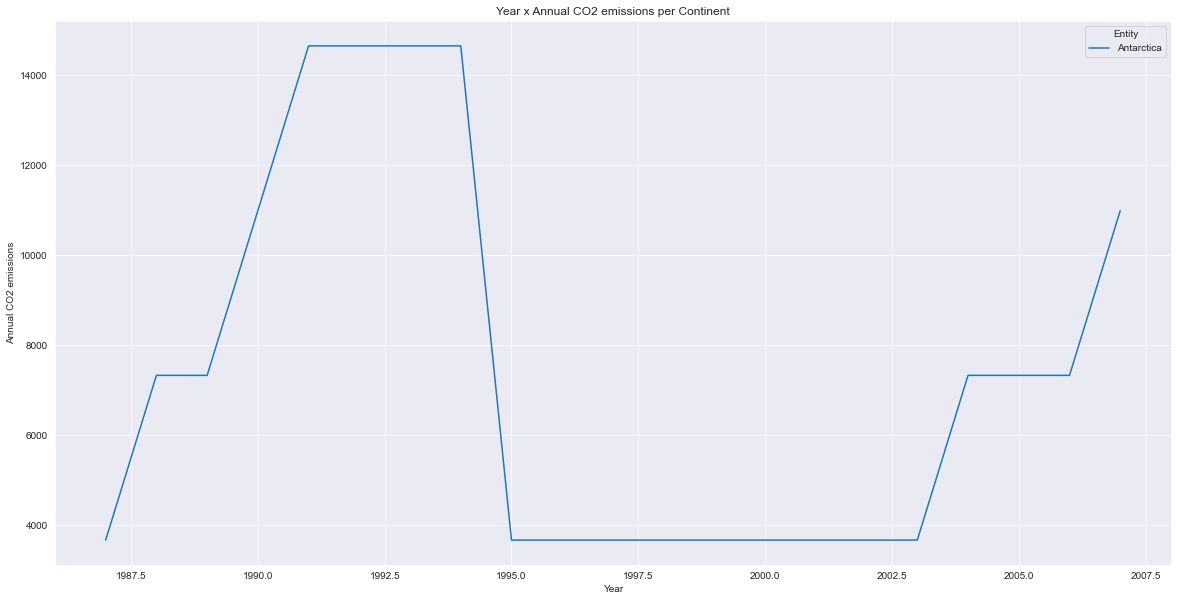

In [36]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual change in primary energy consumption (%)'] per Continent")

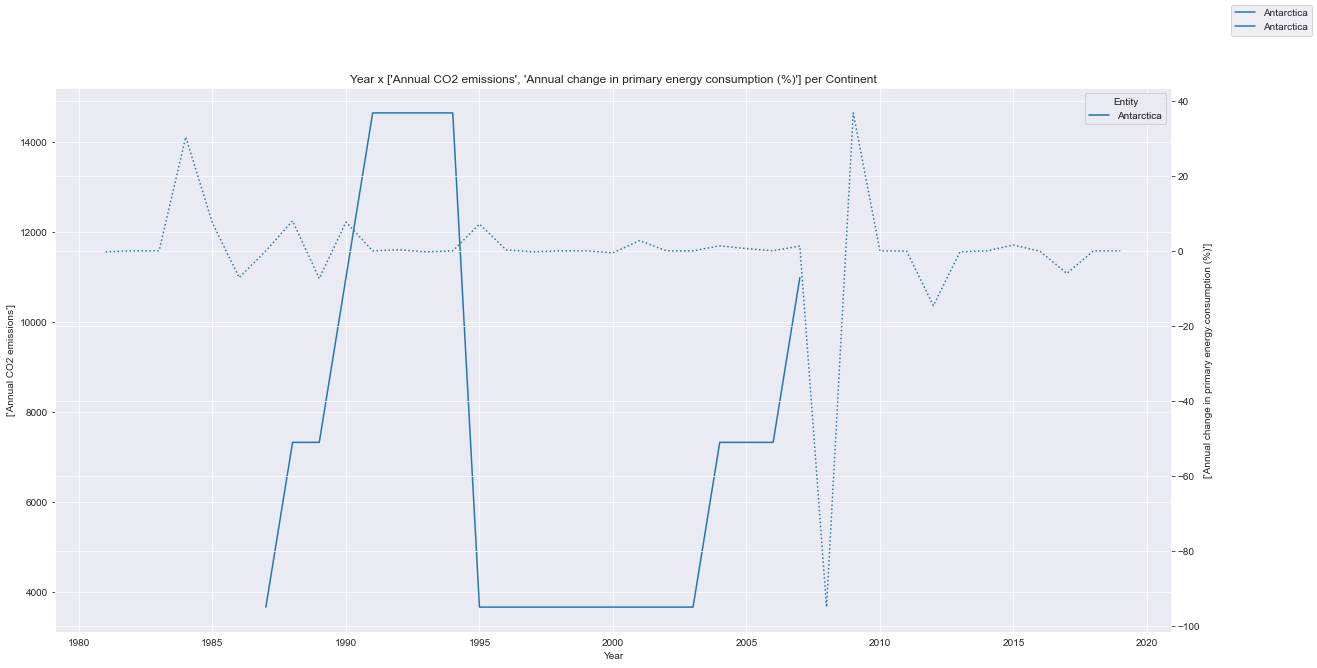

In [37]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] per Continent")

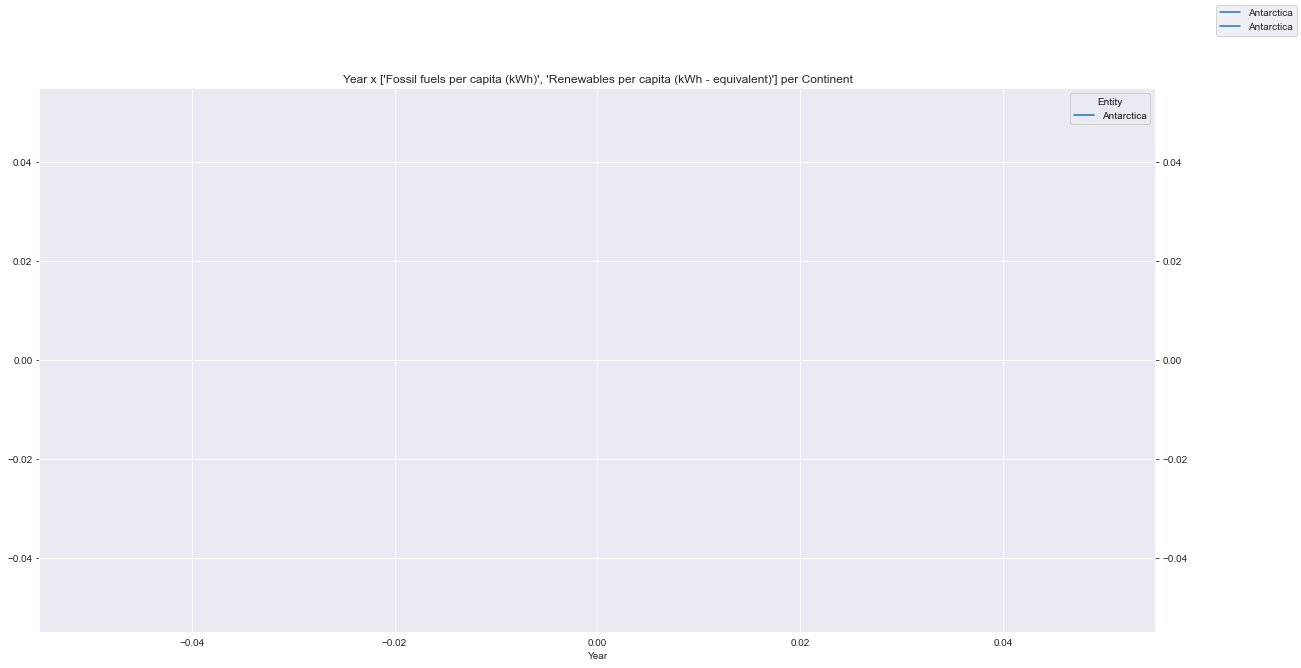

In [38]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

c:\Users\abdul\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Solar Generation - TWh', 'prod of Electricity from solar (TWh)'] per Continent")

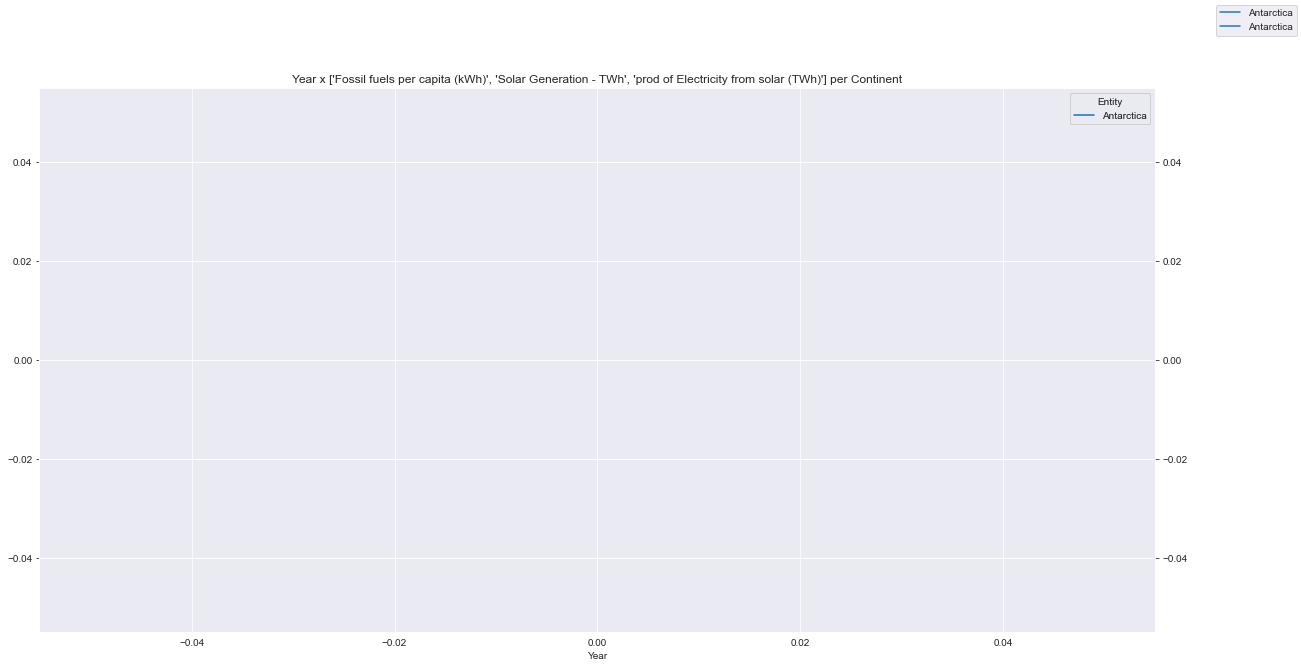

In [39]:
y1 = ['Fossil fuels per capita (kWh)']
y2 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']


df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

#### Correlation Heatmap - For Entity Across Metrics

In [40]:
#TODO Multiplot for each Income Level
# corr = df[key_columns].corr()

# sns.heatmap(data=corr)
# plt.title(f"Correlation of Key Metrics across Years in Category [{category_filter}]")

#### Correlation Heatmap - For Key Metrics Across Entities in 2020

c:\Users\abdul\Anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\abdul\Anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


Text(0.5, 1.0, 'Correlation of Key Metrics across each Category [Continent]')

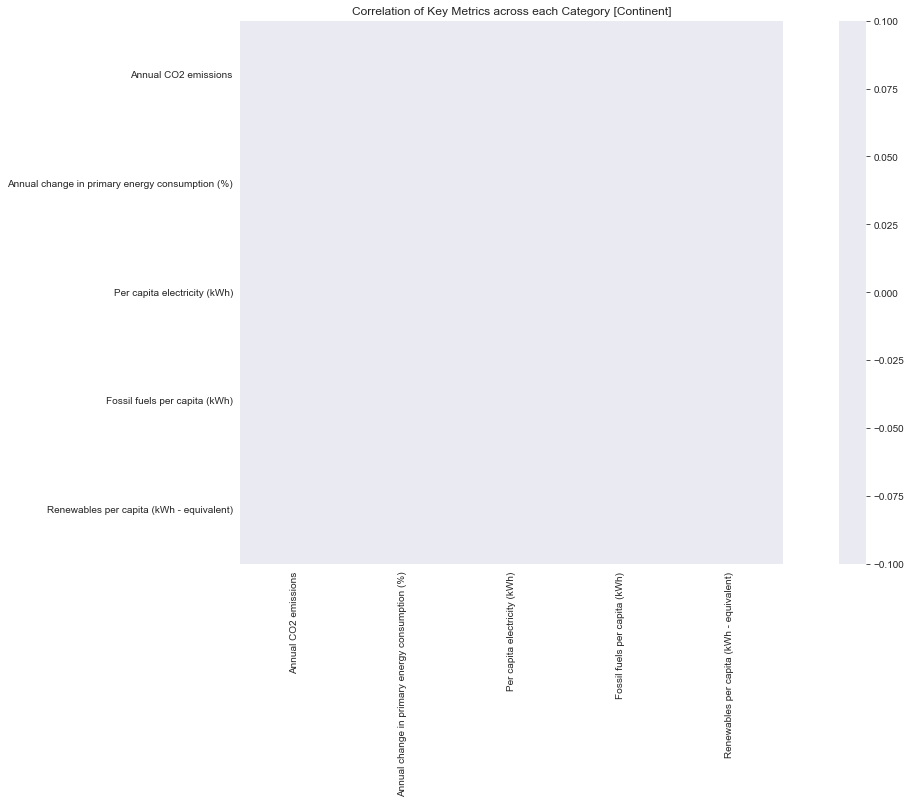

In [41]:
corr = df.loc[df['Year'] == 2020][corr_columns].corr()

masked_heatmap()
plt.title(f"Correlation of Key Metrics across each Category [{category_filter}]")

### Specific Countries

In [42]:
category_filter = "Country"

df = df_original.copy().loc[
    (df_original['Entity_Category'] == category_filter)
    & (df_original['Entity'].isin(country_list))
]

In [43]:
df.head()

,Entity,Year,Code,Region,Income group,Lending category,Fossil fuels per capita (kWh),Oil Consumption - TWh,Economy,"Coal (TWh, direct energy)",Geo Biomass Other - TWh,Wind Generation - TWh,Fossil fuels (% equivalent primary energy),prod of Other renewables including bioenergy (TWh),Coal Production - TWh,Gas Production - TWh,"Gas (TWh, direct energy)",Per capita electricity (kWh),Renewables (% electricity),Annual CO2 emissions,Fossil fuels (TWh),Hydro Generation - TWh,Oil Production - TWh,Population density (people per sq. km of land area),Coal Consumption - TWh,Renewables per capita (kWh - equivalent),prod of Electricity from solar (TWh),Annual change in primary energy consumption (%),Solar Generation - TWh,Land area (sq. km),Gas Consumption - TWh,"Oil (TWh, direct energy)",prod of Electricity from hydro (TWh),Fossil fuels (% growth),prod of Electricity from wind (TWh),Entity_Category
429,United Arab Emirates,1961,ARE,Middle East & North Africa,High income,NaN,NaN,NaN,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10992.0,NaN,NaN,NaN,1.419333,NaN,NaN,NaN,NaN,NaN,71020.0,NaN,NaN,NaN,NaN,NaN,Country
430,United Arab Emirates,1962,ARE,Middle East & North Africa,High income,NaN,NaN,NaN,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18320.0,NaN,NaN,NaN,1.578598,NaN,NaN,NaN,NaN,NaN,71020.0,NaN,NaN,NaN,NaN,NaN,Country
431,United Arab Emirates,1963,ARE,Middle East & North Africa,High income,NaN,NaN,NaN,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21984.0,NaN,NaN,NaN,1.761898,NaN,NaN,NaN,NaN,NaN,71020.0,NaN,NaN,NaN,NaN,NaN,Country
432,United Arab Emirates,1964,ARE,Middle East & North Africa,High income,NaN,NaN,NaN,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18320.0,NaN,NaN,NaN,1.943805,NaN,NaN,NaN,NaN,NaN,71020.0,NaN,NaN,NaN,NaN,NaN,Country
433,United Arab Emirates,1965,ARE,Middle East & North Africa,High income,NaN,5702.398926,0.854533,United Arab Emirates,NaN,0.0,0.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,21984.0,0.854533,0.0,158.939224,2.110039,0.0,0.0,0.0,NaN,0.0,71020.0,0.0,NaN,0.0,NaN,0.0,Country


In [44]:
df.describe()

,Year,Fossil fuels per capita (kWh),Oil Consumption - TWh,"Coal (TWh, direct energy)",Geo Biomass Other - TWh,Wind Generation - TWh,Fossil fuels (% equivalent primary energy),prod of Other renewables including bioenergy (TWh),Coal Production - TWh,Gas Production - TWh,"Gas (TWh, direct energy)",Per capita electricity (kWh),Renewables (% electricity),Annual CO2 emissions,Fossil fuels (TWh),Hydro Generation - TWh,Oil Production - TWh,Population density (people per sq. km of land area),Coal Consumption - TWh,Renewables per capita (kWh - equivalent),prod of Electricity from solar (TWh),Annual change in primary energy consumption (%),Solar Generation - TWh,Land area (sq. km),Gas Consumption - TWh,"Oil (TWh, direct energy)",prod of Electricity from hydro (TWh),Fossil fuels (% growth),prod of Electricity from wind (TWh)
count,182.000000,114.000000,114.000000,0.0,114.000000,114.000000,114.000000,135.000000,41.000000,52.000000,0.0,95.000000,95.000000,1.800000e+02,114.000000,113.000000,57.000000,180.000000,114.000000,113.000000,135.000000,151.000000,114.000000,180.000000,114.000000,0.0,134.000000,112.000000,135.000000
mean,1990.835165,79199.419018,1418.438444,NaN,6.745026,0.747116,93.169404,5.698022,36.018369,297.710938,NaN,7787.065473,19.096665,3.606879e+08,2339.031468,40.760278,1218.137803,147.552429,493.112743,1.279683,3.773398,9.237879,4.466743,221290.516667,427.480340,NaN,35.351876,10.909919,0.630898
std,17.562053,60635.104950,1275.788943,NaN,9.895221,1.859409,7.472098,9.410938,37.288900,204.985641,NaN,4533.019064,26.312016,4.845640e+08,1980.615540,40.867839,533.575688,131.423791,533.222085,1.289386,14.073794,41.385853,15.223786,120562.022947,368.856558,NaN,39.563814,47.503457,1.728999
min,1961.000000,5701.004883,0.854533,NaN,0.000000,0.000000,79.608032,0.000000,4.353467,8.121750,NaN,268.414124,0.000000,1.099200e+04,0.854533,0.000000,158.939224,1.419333,0.000000,0.000000,0.000000,-33.705948,0.000000,71020.000000,0.000000,NaN,0.000000,-11.246496,0.000000
25%,1976.000000,34025.682617,227.300613,NaN,0.000000,0.000000,85.876644,0.000000,7.967745,91.065001,NaN,6009.556397,0.003707,6.178898e+06,433.771286,0.000000,837.894653,37.571667,0.000000,0.000000,0.000000,-0.307944,0.000000,71020.000000,74.593466,NaN,0.000000,-0.274105,0.000000
50%,1991.000000,39942.439453,778.247498,NaN,0.006000,0.000000,95.624290,0.010000,18.878025,317.459991,NaN,8575.028320,9.316031,5.542978e+07,1442.673950,64.461998,1302.895874,92.341206,285.246346,1.807716,0.000000,3.640008,0.000000,227540.000000,362.309998,NaN,6.335000,3.530502,0.000000
75%,2006.000000,127611.273438,2705.307434,NaN,14.668138,0.000960,100.000000,11.984570,52.390591,489.961876,NaN,10543.616695,17.323944,8.984534e+08,4414.742798,80.816002,1588.110840,305.248295,906.468689,2.337947,0.072711,9.734577,0.309019,364500.000000,695.700027,NaN,79.345392,9.734333,0.000000
max,2021.000000,217244.671875,3314.044434,NaN,35.757641,8.249907,100.000015,35.757641,114.608490,595.366882,NaN,15030.304690,91.725105,1.315343e+09,5200.919434,94.416000,2121.074707,351.358025,1415.963501,4.468073,86.266273,492.819305,86.266273,366700.000000,1247.521240,NaN,94.416000,492.819305,8.249907


#### Lineplots - Yearly

In [45]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

Text(0.5, 1.0, 'Year x Annual CO2 emissions per Country')

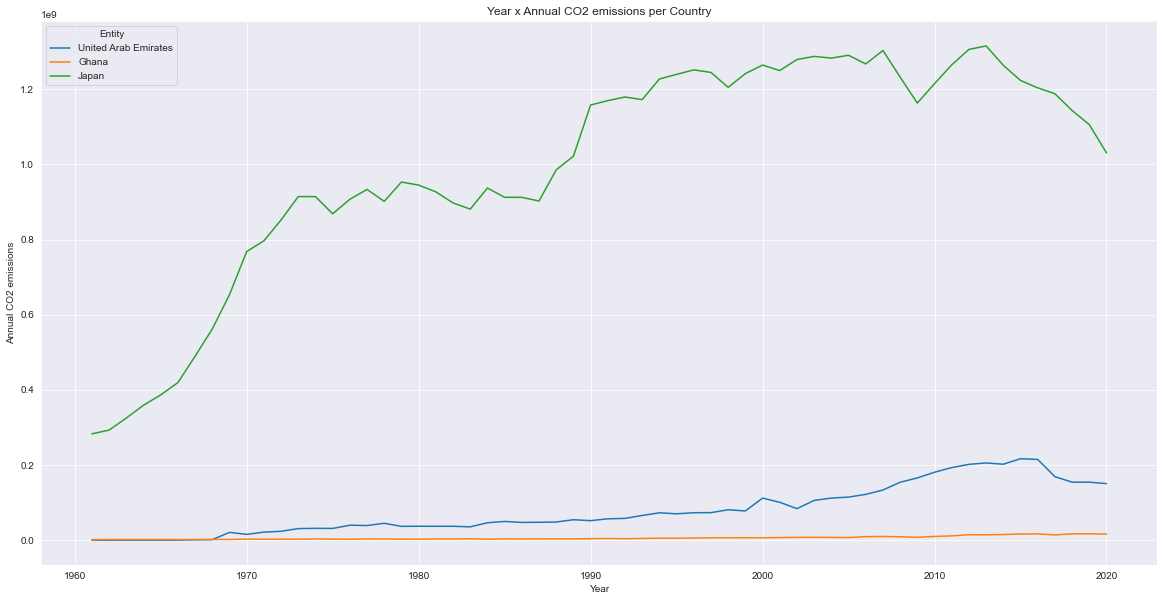

In [46]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual change in primary energy consumption (%)'] per Country")

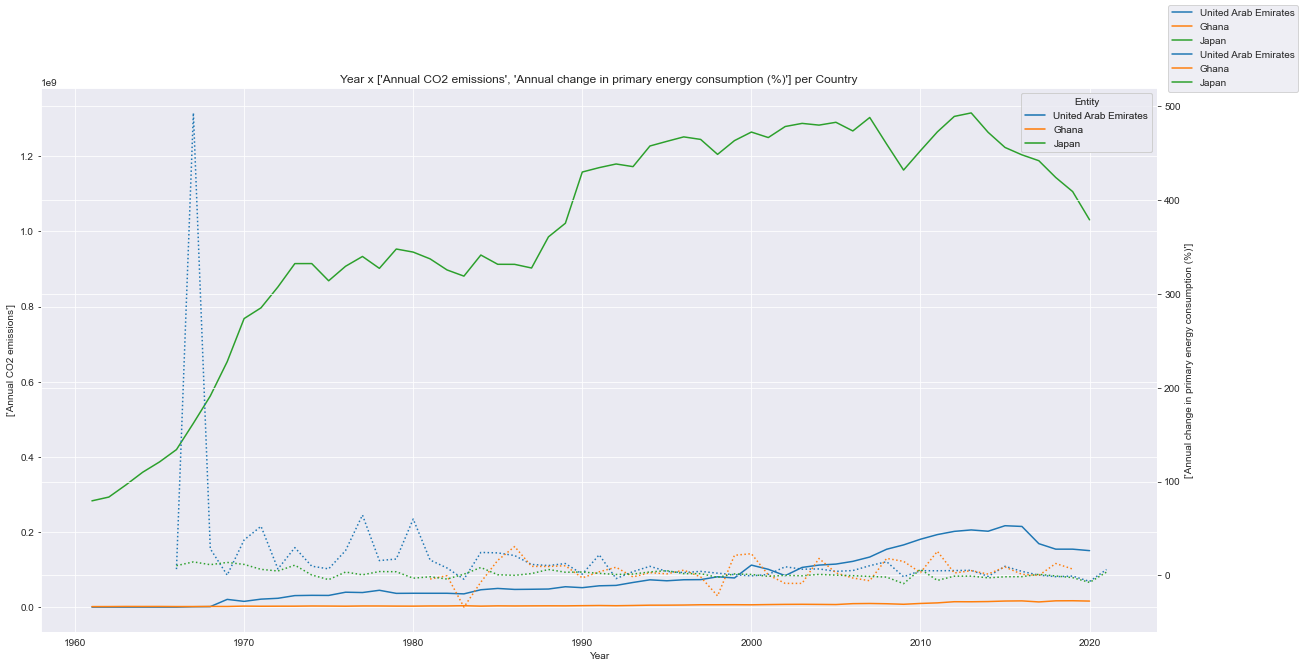

In [47]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] per Country")

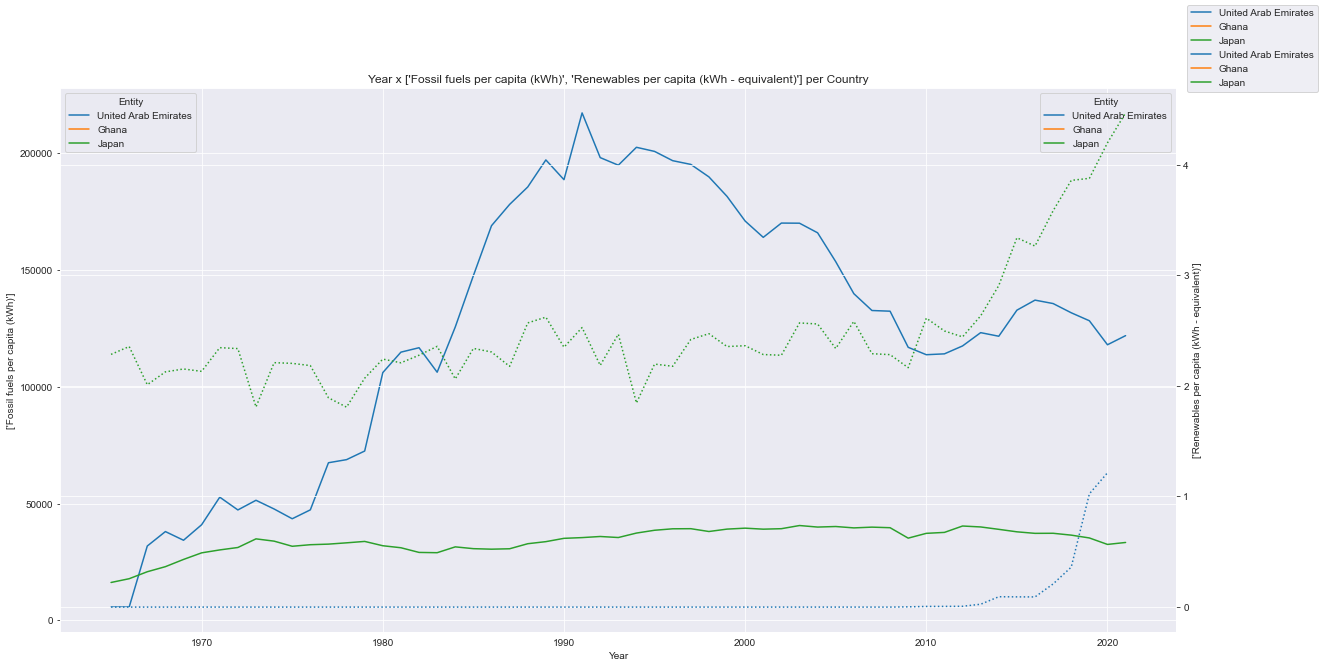

In [48]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Solar Generation - TWh', 'prod of Electricity from solar (TWh)'] per Country")

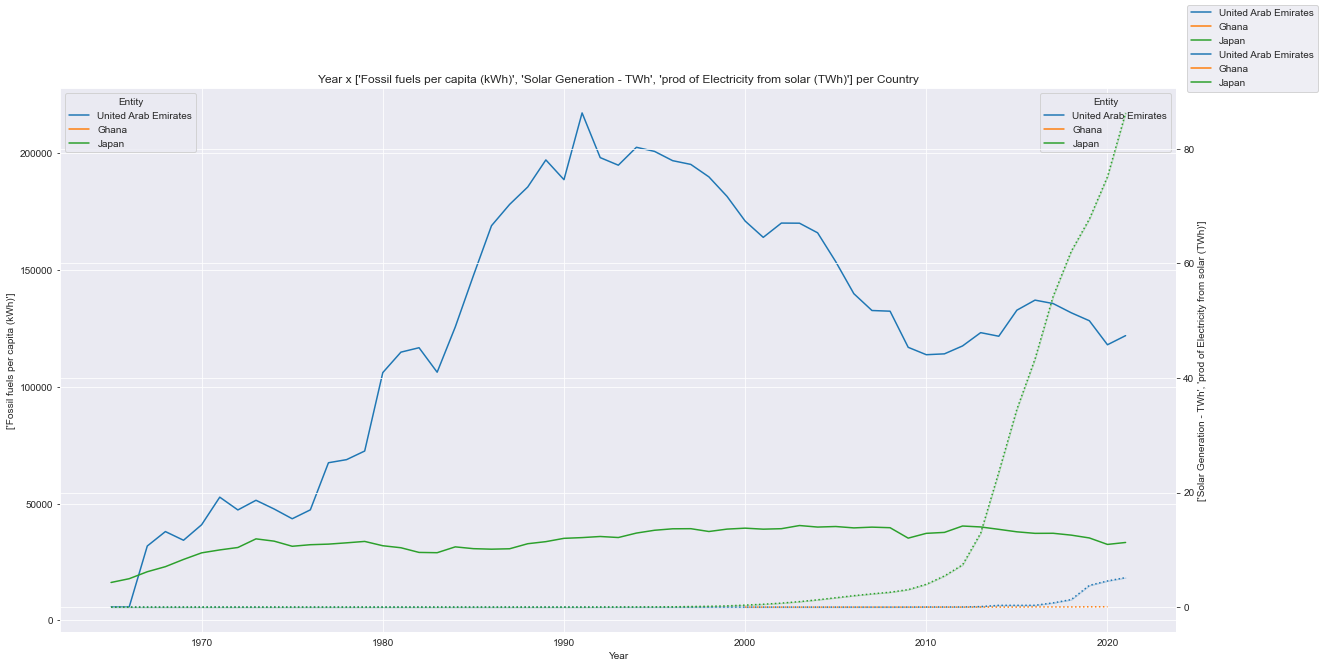

In [49]:
y1 = ['Fossil fuels per capita (kWh)']
y2 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']


df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

#### Correlation Heatmap - For Entity Across Metrics

In [50]:
#TODO Multiplot for each Income Level
# corr = df[key_columns].corr()

# sns.heatmap(data=corr)
# plt.title(f"Correlation of Key Metrics across Years in Category [{category_filter}]")

#### Correlation Heatmap - For Key Metrics Across Entities in 2020

Text(0.5, 1.0, 'Correlation of Key Metrics across each Category [Country]')

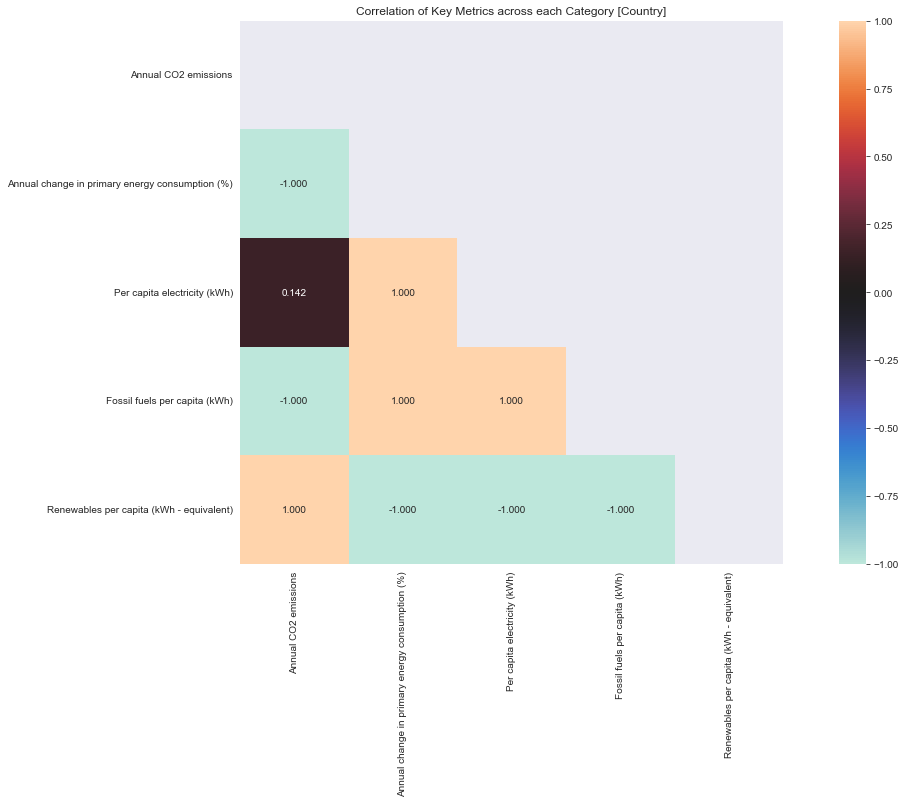

In [51]:
corr = df.loc[df['Year'] == 2020][corr_columns].corr()

masked_heatmap()
plt.title(f"Correlation of Key Metrics across each Category [{category_filter}]")